<a href="https://colab.research.google.com/github/NecipOz/magnimind/blob/main/Data_exploration_capstone_project_Necip_Ozfidan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magnimind Academy Fullstack Data Science Career Track Data Exploration Capstone Project 

## Objectives
Hi All! You are learning a lot in a short span of time. It is now the time to test your data exploration skills with this capstone!

In this notebook, you're going to apply the skills you've been learning, bridging the gap towards the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***In this notebook, we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to ask for help; the more independent work you do, the better it is for your learning!***

This challenge will make use of Data Exploration with Python skills. 



## The Data Science Pipeline

When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 


#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 


# Load the pyplot collection of functions from matplotlib, as plt 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import math

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties_org = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)
properties = properties_org.copy()

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 


**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [4]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            321 non-null    datetime64[ns]
 1   City of London        322 non-null    object        
 2   Barking & Dagenham    322 non-null    object        
 3   Barnet                322 non-null    object        
 4   Bexley                322 non-null    object        
 5   Brent                 322 non-null    object        
 6   Bromley               322 non-null    object        
 7   Camden                322 non-null    object        
 8   Croydon               322 non-null    object        
 9   Ealing                322 non-null    object        
 10  Enfield               322 non-null    object        
 11  Greenwich             322 non-null    object        
 12  Hackney               322 non-null    object        
 13  Hammersmith & Fulham

In [5]:
properties.describe(include="object").T

,count,unique,top,freq
City of London,322,320,-,3
Barking & Dagenham,322,322,E09000002,1
Barnet,322,322,E09000003,1
Bexley,322,322,E09000004,1
Brent,322,322,E09000005,1
Bromley,322,322,E09000006,1
Camden,322,322,E09000007,1
Croydon,322,322,E09000008,1
Ealing,322,322,E09000009,1
Enfield,322,322,E09000010,1


In [6]:
# Choose only boroughs (London has 32 boroughs)
properties = properties.iloc[:,:34]
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            321 non-null    datetime64[ns]
 1   City of London        322 non-null    object        
 2   Barking & Dagenham    322 non-null    object        
 3   Barnet                322 non-null    object        
 4   Bexley                322 non-null    object        
 5   Brent                 322 non-null    object        
 6   Bromley               322 non-null    object        
 7   Camden                322 non-null    object        
 8   Croydon               322 non-null    object        
 9   Ealing                322 non-null    object        
 10  Enfield               322 non-null    object        
 11  Greenwich             322 non-null    object        
 12  Hackney               322 non-null    object        
 13  Hammersmith & Fulham

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [66]:
properties.head()

,date,borough,price,year,month
0,1995-01-01,Barking & Dagenham,50460.2266,1995,1
1,1995-02-01,Barking & Dagenham,51085.77983,1995,2
2,1995-03-01,Barking & Dagenham,51268.96956,1995,3
3,1995-04-01,Barking & Dagenham,53133.50526,1995,4
4,1995-05-01,Barking & Dagenham,53042.24852,1995,5


In [8]:
properties.drop(index=0, inplace=True)

In [9]:
properties.rename(columns={"Unnamed: 0": "date"}, inplace=True)

In [10]:
properties.drop(columns='City of London', axis=1, inplace=True)

In [11]:
properties.head()

,date,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
1,1995-01-01,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,72514.69096,...,82070.6133,53539.31919,72189.58437,109326.1245,67885.20344,71536.97357,59865.18995,61319.44913,88559.04381,133025.2772
2,1995-02-01,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,73155.19746,...,79982.74872,53153.88306,72141.6261,111103.0394,64799.0648,70893.20851,62318.53353,60252.12246,88641.01678,131468.3096
3,1995-03-01,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,72190.44144,...,80661.68279,53458.26393,72501.35502,107325.4742,65763.29719,70306.83844,63938.67686,60871.08493,87124.81523,132260.3417
4,1995-04-01,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,71442.92235,...,79990.54333,54479.75395,72228.60295,106875,63073.62117,69411.9439,66233.19383,60971.39722,87026.00225,133370.2036
5,1995-05-01,53042.24852,90258.00033,63997.13588,73704.04743,81542.61561,119929.2782,68844.9169,82077.05525,70630.77955,...,80873.98643,55803.95958,72366.64122,107707.6799,64420.49933,69759.21989,66432.85846,61494.16938,86518.05945,133911.1117


In [12]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 1 to 321
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  321 non-null    datetime64[ns]
 1   Barking & Dagenham    321 non-null    object        
 2   Barnet                321 non-null    object        
 3   Bexley                321 non-null    object        
 4   Brent                 321 non-null    object        
 5   Bromley               321 non-null    object        
 6   Camden                321 non-null    object        
 7   Croydon               321 non-null    object        
 8   Ealing                321 non-null    object        
 9   Enfield               321 non-null    object        
 10  Greenwich             321 non-null    object        
 11  Hackney               321 non-null    object        
 12  Hammersmith & Fulham  321 non-null    object        
 13  Haringey            

In [13]:
properties.isnull().sum()

date                    0
Barking & Dagenham      0
Barnet                  0
Bexley                  0
Brent                   0
Bromley                 0
Camden                  0
Croydon                 0
Ealing                  0
Enfield                 0
Greenwich               0
Hackney                 0
Hammersmith & Fulham    0
Haringey                0
Harrow                  0
Havering                0
Hillingdon              0
Hounslow                0
Islington               0
Kensington & Chelsea    0
Kingston upon Thames    0
Lambeth                 0
Lewisham                0
Merton                  0
Newham                  0
Redbridge               0
Richmond upon Thames    0
Southwark               0
Sutton                  0
Tower Hamlets           0
Waltham Forest          0
Wandsworth              0
Westminster             0
dtype: int64

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

**2.4.Transforming the data**
 
You might need to **melt** your DataFrame here. 

In [14]:
properties = pd.melt(properties, id_vars="date")

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [15]:
properties.head()

,date,variable,value
0,1995-01-01,Barking & Dagenham,50460.2266
1,1995-02-01,Barking & Dagenham,51085.77983
2,1995-03-01,Barking & Dagenham,51268.96956
3,1995-04-01,Barking & Dagenham,53133.50526
4,1995-05-01,Barking & Dagenham,53042.24852


In [16]:
properties.columns = ['date', 'borough', 'price']

In [17]:
properties.columns

Index(['date', 'borough', 'price'], dtype='object')

In [18]:
properties.price.astype(float)

0        5.046023e+04
1        5.108578e+04
2        5.126897e+04
3        5.313351e+04
4        5.304225e+04
             ...     
10267    9.082093e+05
10268    8.883429e+05
10269    9.223310e+05
10270    1.016725e+06
10271    9.657664e+05
Name: price, Length: 10272, dtype: float64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [19]:
properties.isnull().sum()

date       0
borough    0
price      0
dtype: int64

In [20]:
properties.borough.value_counts().sort_values()

Barking & Dagenham      321
Brent                   321
Bromley                 321
Camden                  321
Croydon                 321
Ealing                  321
Enfield                 321
Greenwich               321
Hackney                 321
Hammersmith & Fulham    321
Haringey                321
Harrow                  321
Havering                321
Hillingdon              321
Hounslow                321
Islington               321
Kensington & Chelsea    321
Kingston upon Thames    321
Lambeth                 321
Lewisham                321
Merton                  321
Newham                  321
Redbridge               321
Richmond upon Thames    321
Southwark               321
Sutton                  321
Tower Hamlets           321
Waltham Forest          321
Wandsworth              321
Barnet                  321
Bexley                  321
Westminster             321
Name: borough, dtype: int64

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [21]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     10272 non-null  datetime64[ns]
 1   borough  10272 non-null  object        
 2   price    10272 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 240.9+ KB


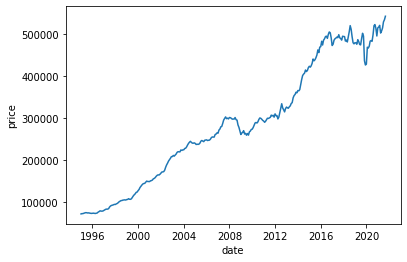

In [22]:
sns.lineplot(x='date', y='price', data=properties[properties.borough=='Brent']);

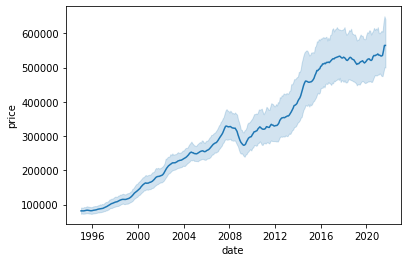

In [23]:
sns.lineplot(x='date', y='price', data=properties);

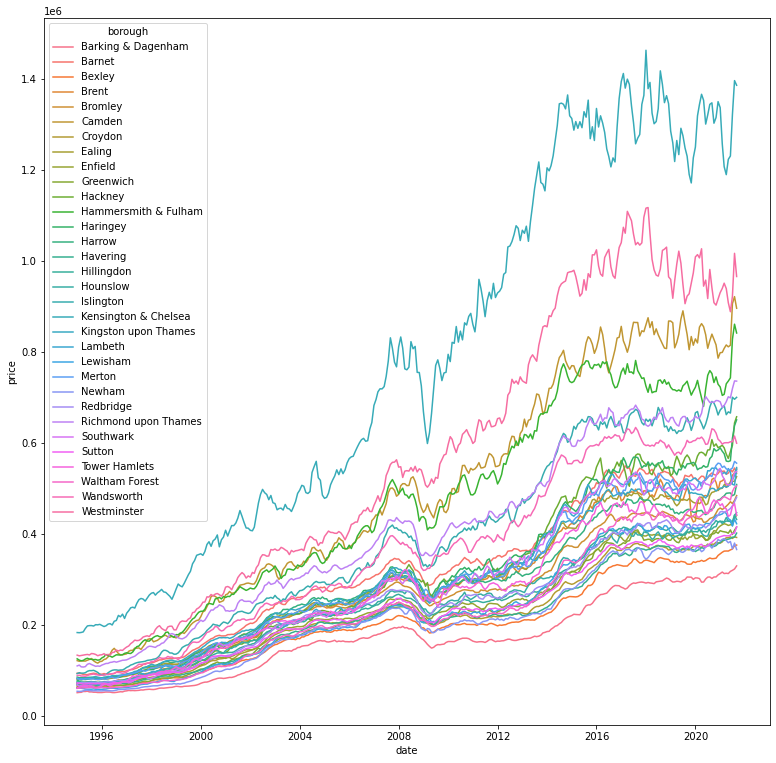

In [38]:
plt.figure(figsize=(13,13))
sns.lineplot(x='date', y='price', hue='borough', data=properties);

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [24]:
properties['year'] = properties.date.dt.year

In [25]:
properties['month'] = properties.date.dt.month

###*First we find the greatest house difference by subtracting the price in last month from first month.*

In [44]:
price_first = properties[properties.date=='1995-01-01'][['borough','price']]
price_first.rename(columns={'price':'price_first'},inplace=True)
price_first

,borough,price_first
0,Barking & Dagenham,50460.2266
321,Barnet,93284.51832
642,Bexley,64958.09036
963,Brent,71306.56698
1284,Bromley,81671.47692
1605,Camden,120932.8881
1926,Croydon,69158.16225
2247,Ealing,79885.89069
2568,Enfield,72514.69096
2889,Greenwich,62300.10169


In [43]:
price_last = properties[properties.date=='2021-09-01'][['borough','price']]
price_last.rename(columns={'price':'price_last'},inplace=True)
price_last

,borough,price_last
320,Barking & Dagenham,329287.2922
641,Barnet,533093.293
962,Bexley,375156.155
1283,Brent,542095.3343
1604,Bromley,483955.024
1925,Camden,895902.4347
2246,Croydon,391878.8752
2567,Ealing,525536.4856
2888,Enfield,440813.0792
3209,Greenwich,414809.8387


In [46]:
price_merge = pd.merge(price_first, price_last, on=['borough'], how='inner')

In [47]:
price_merge

,borough,price_first,price_last
0,Barking & Dagenham,50460.2266,329287.2922
1,Barnet,93284.51832,533093.293
2,Bexley,64958.09036,375156.155
3,Brent,71306.56698,542095.3343
4,Bromley,81671.47692,483955.024
5,Camden,120932.8881,895902.4347
6,Croydon,69158.16225,391878.8752
7,Ealing,79885.89069,525536.4856
8,Enfield,72514.69096,440813.0792
9,Greenwich,62300.10169,414809.8387


In [56]:
def f(a,b):
    return round((a - b),3)

price_merge['price_diff']  = price_merge.apply(lambda x: f(x['price_last'],x['price_first']), axis=1)


In [73]:
price_diff_sorted = price_merge.sort_values(by='price_diff', ascending=False)

In [82]:
price_diff_sorted['rank_diff_last_first'] = np.arange(1,33)
price_diff_sorted

,borough,price_first,price_last,price_diff,rank_diff_last_first
18,Kensington & Chelsea,182694.8326,1386350.167,1203655.334,1
31,Westminster,133025.2772,965766.3554,832741.078,2
5,Camden,120932.8881,895902.4347,774969.547,3
11,Hammersmith & Fulham,124902.8602,841494.9545,716592.094,4
25,Richmond upon Thames,109326.1245,735675.2191,626349.095,5
17,Islington,92516.48557,700001.0762,607484.591,6
10,Hackney,61296.52637,657278.2784,595981.752,7
12,Haringey,76287.56947,650508.7965,574221.227,8
30,Wandsworth,88559.04381,599124.4127,510565.369,9
20,Lambeth,67770.98843,542030.0084,474259.020,10


### *Now we find the average price (by year) difference. We find the average prices of boroughs in years 2021 and 1995 and subtract.*

In [68]:
price_1995 = properties[properties.year==1995].groupby('borough').price.mean()

In [69]:
price_2021 = properties[properties.year==2021].groupby('borough').price.mean()

In [83]:
price_avg_diff = pd.DataFrame(round(price_2021-price_1995,3).sort_values(ascending=False))
price_avg_diff['rank_avg_year'] = np.arange(1,33)
price_avg_diff.rename(columns={'price':'price_avg_year'},inplace=True)
price_avg_diff

,price_avg_year,rank_avg_year
borough,,
Kensington & Chelsea,1090526.942,1
Westminster,806475.079,2
Camden,720640.132,3
Hammersmith & Fulham,640341.188,4
Richmond upon Thames,593645.333,5
Islington,584730.777,6
Hackney,533103.723,7
Wandsworth,513357.378,8
Haringey,511505.049,9


In [87]:
borough_price_diff = pd.merge(price_diff_sorted,price_avg_diff,on='borough', how='left')
borough_price_diff

,borough,price_first,price_last,price_diff,rank_diff_last_first,price_avg_year,rank_avg_year
0,Kensington & Chelsea,182694.8326,1386350.167,1203655.334,1,1090526.942,1
1,Westminster,133025.2772,965766.3554,832741.078,2,806475.079,2
2,Camden,120932.8881,895902.4347,774969.547,3,720640.132,3
3,Hammersmith & Fulham,124902.8602,841494.9545,716592.094,4,640341.188,4
4,Richmond upon Thames,109326.1245,735675.2191,626349.095,5,593645.333,5
5,Islington,92516.48557,700001.0762,607484.591,6,584730.777,6
6,Hackney,61296.52637,657278.2784,595981.752,7,533103.723,7
7,Haringey,76287.56947,650508.7965,574221.227,8,511505.049,9
8,Wandsworth,88559.04381,599124.4127,510565.369,9,513357.378,8
9,Lambeth,67770.98843,542030.0084,474259.020,10,462706.801,11


### *Analysis of last 5 year*

In [100]:
price_2016 = properties[properties.year==2016].groupby('borough').price.mean()

In [101]:
price_diff_last5year = pd.DataFrame(round(price_2021-price_2016,3).sort_values(ascending=False))
price_diff_last5year['rank_avg_year'] = np.arange(1,33)
price_diff_last5year

,price,rank_avg_year
borough,,
Waltham Forest,71829.449,1
Redbridge,65250.811,2
Haringey,63906.928,3
Hackney,61381.853,4
Richmond upon Thames,49776.788,5
Merton,47740.375,6
Havering,47390.441,7
Barking & Dagenham,43272.772,8
Bexley,42931.434,9


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 


In [32]:
avg_price_1998 = properties[properties.year==1998].groupby('borough').price.mean()

In [33]:
avg_price_2018 = properties[properties.year==2018].groupby('borough').price.mean()

In [106]:
ratio_1998_2018 = avg_price_1998/avg_price_2018

ratio_1998_2018 = round(ratio_1998_2018.sort_values(ascending=False),3)
ratio_1998_2018

borough
Hounslow                0.251
Richmond upon Thames    0.250
Harrow                  0.246
Bromley                 0.244
Sutton                  0.243
Hammersmith & Fulham    0.242
Hillingdon              0.238
Croydon                 0.238
Bexley                  0.235
Enfield                 0.235
Kingston upon Thames    0.234
Ealing                  0.232
Havering                0.231
Barnet                  0.229
Redbridge               0.224
Tower Hamlets           0.216
Merton                  0.211
Wandsworth              0.210
Greenwich               0.210
Islington               0.206
Brent                   0.204
Barking & Dagenham      0.204
Camden                  0.203
Lambeth                 0.202
Kensington & Chelsea    0.197
Haringey                0.195
Newham                  0.188
Westminster             0.187
Lewisham                0.184
Southwark               0.181
Waltham Forest          0.171
Hackney                 0.161
Name: price, dtype: float64

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [92]:
borough_price_diff.borough[:5].values

array(['Kensington & Chelsea', 'Westminster', 'Camden',
       'Hammersmith & Fulham', 'Richmond upon Thames'], dtype=object)

In [104]:
price_diff_last5year.index[:5]

Index(['Waltham Forest', 'Redbridge', 'Haringey', 'Hackney',
       'Richmond upon Thames'],
      dtype='object', name='borough')

In [107]:
ratio_1998_2018.index[:5]

Index(['Hounslow', 'Richmond upon Thames', 'Harrow', 'Bromley', 'Sutton'], dtype='object', name='borough')

In this study the house price difference of London boroughs analyzed. In data average prices of house price of London boroughs in every month between 1995 and 2021 are given. The top 5 boroughs which have greatest house differences are 'Kensington & Chelsea', 'Westminster', 'Camden', 'Hammersmith & Fulham', 'Richmond upon Thames'. However, in the last five year the top 5 boroughs which have greatest house differences are 'Waltham Forest', 'Redbridge', 'Haringey', 'Hackney', 'Richmond upon Thames'. Besides, the top 5 boroughs between 1998 and 2018 are 'Hounslow', 'Richmond upon Thames', 'Harrow', 'Bromley', 'Sutton'. As a result of these analysis 'Richmond upon Thames' house prices has a regular increase. Although 'Kensington & Chelsea' house prices has the greatest increase in last two decades, its prices are very irregular in last 5 years. The graph of house prices of boroughs is shown in the figure below. 

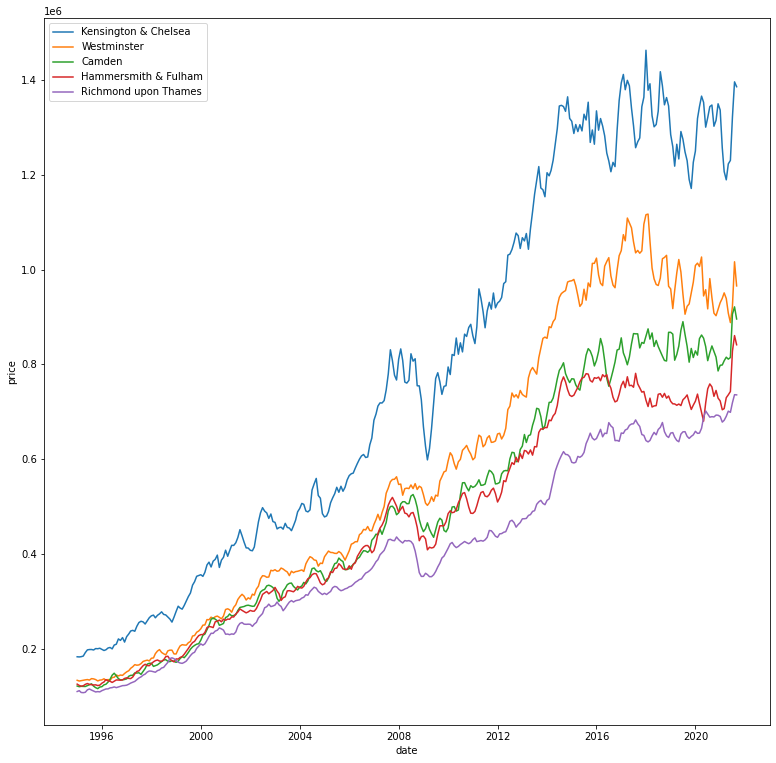

In [99]:
plt.figure(figsize=(13,13))
for i in range(5):
  sns.lineplot(x='date', y='price', 
               data=properties[properties['borough']==borough_price_diff.borough[i]],
               label=borough_price_diff.borough[i]);